In [132]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [119]:
#import des données
data_dir = '../data/mushrooms.csv'
mushrooms_df = pd.read_csv(data_dir, delimiter=',', encoding='UTF-8')


In [120]:
def pred_gill_size(data):
    retour = ''
    if data['gill-size']=='b':
        retour = 'e'
    else:
        retour = 'p'
    return retour

mushrooms_df['pred_gill_size'] = mushrooms_df.apply(pred_gill_size,axis=1)

In [121]:
#données de sorties
np.unique(mushrooms_df['pred_gill_size'])

array(['e', 'p'], dtype=object)

In [122]:
#évaluation des des résultats
pred_gill_size=((mushrooms_df['pred_gill_size'] == mushrooms_df['class']).sum() / mushrooms_df.shape[0])*100

print('Taux de réussite : ',pred_gill_size)

Taux de réussite :  75.62776957163959


In [123]:
def pred_gill_color(data):
    retour = ''
    if data['gill-color']=='b':
        retour = 'p'
    else:
        retour = 'e'
    return retour

mushrooms_df['pred_gill_color'] = mushrooms_df.apply(pred_gill_color,axis=1)

In [124]:
pred_gill_color=((mushrooms_df['pred_gill_color'] == mushrooms_df['class']).sum() / mushrooms_df.shape[0])*100

print('Taux de réussite : ',pred_gill_color)

Taux de réussite :  73.06745445593303


In [125]:
def pred_combinated(data):
    retour = ''
    if data['gill-size']=='b' and not(data['gill-color']=='b') :
        retour = 'e'
    else:
        retour = 'p'
    return retour

mushrooms_df['pred_gill_combinated'] = mushrooms_df.apply(pred_combinated,axis=1)

In [126]:
pred_gill_combinated=((mushrooms_df['pred_gill_combinated'] == mushrooms_df['class']).sum() / mushrooms_df.shape[0])*100

print('Taux de réussite : ',pred_gill_combinated)

Taux de réussite :  75.62776957163959


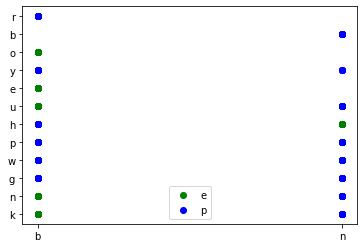

In [127]:
#graphique des résulatats réels vs ce que l'on a prédit
import matplotlib.pyplot as plt
x=mushrooms_df.loc[:,'gill-size']
y=mushrooms_df.loc[:,'gill-color']
lab=mushrooms_df.loc[:,'class']
plt.scatter(x[lab == 'e'], y[lab == 'e'], color='g', label='e')
plt.scatter(x[lab == 'p'], y[lab == 'p'], color='b', label='p')
plt.legend()
plt.show()

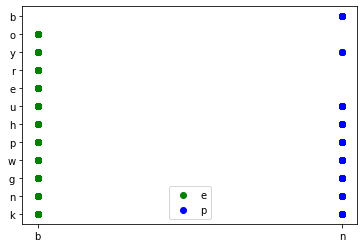

In [128]:
import matplotlib.pyplot as plt
x=mushrooms_df.loc[:,'gill-size']
y=mushrooms_df.loc[:,'gill-color']
lab=mushrooms_df.loc[:,'pred_gill_combinated']
plt.scatter(x[lab == 'e'], y[lab == 'e'], color='g', label='e')
plt.scatter(x[lab == 'p'], y[lab == 'p'], color='b', label='p')
plt.legend()
plt.show()

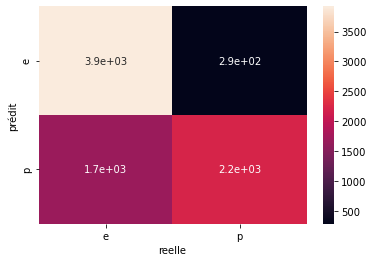

In [129]:
cm = confusion_matrix(mushrooms_df['class'], mushrooms_df['pred_gill_combinated'])
cm_df = pd.DataFrame(cm,
                     index = ['e','p'], 
                     columns = ['e','p'])

sns.heatmap(cm_df, annot=True)
plt.ylabel('prédit')
plt.xlabel('reelle')
plt.show()